# Imdb movie reviews sentiment analysis and dog cat image classification
In this assignment we will build two machine learning classifers. The first classifier is trained to recognize if a movie review is negative or positive, here we use the [Imdb movie reviews](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz) dataset which contains 50000 reviews, half of which are positive and the other half are negative. The second classifier is an image classifer which can predict if an image is a dog image or a cat image. We use the [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats/data) dataset from the 
Dogs vs. Cats competition on Kaggle which includes 25000 images of dogs and cats.
<br>
The main purpose of this notebook is to show you basic steps when training a machine learning model which are shown below.
1. Get the data
2. Load and preprocess the data
3. Choose a model
4. Train the model
5. Evaluate the model
6. Improve the model

## Imdb movie reviews sentiment analysis
Lets build our first classifer.

### Import some libs

In [1]:
import re
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Download the data
Down load the [Imdb movie reviews](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz) dataset, extract and put the **aclImdb** folder into the **data** folder.

### Load the dataset

In [2]:
def load_train_test_imdb_data(data_dir):
    """Loads the IMDB train/test datasets from a folder path.
    Input:
    data_dir: path to the "aclImdb" folder.
    
    Returns:
    train/test datasets as pandas dataframes.
    """

    data = {}
    for split in ["train", "test"]:
        data[split] = []
        for sentiment in ["neg", "pos"]:
            score = 1 if sentiment == "pos" else 0

            path = os.path.join(data_dir, split, sentiment)
            file_names = os.listdir(path)
            for f_name in file_names:
                with open(os.path.join(path, f_name), "r", 
                encoding="utf-8") as f:
                    review = f.read()
                    data[split].append([review, score])

    np.random.shuffle(data["train"])        
    data["train"] = pd.DataFrame(data["train"],
                                 columns=['text', 'sentiment'])

    np.random.shuffle(data["test"])
    data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment'])

    return data["train"], data["test"]

The **load_train_test_imdb_data** help us load the datasets in inside the folder **acllmdb**.
<br>
Complete the cell below in order to load datasets inside the **acllmdb** folder by using the **load_train_test_imdb_data** above.
<br>
It might takes a few minutes to load the datasets.
After load the datasets we now have the **train_data** and the **test_data** dataframes.

In [3]:
# YOUR CODE HERE
# Load the dataset
train_data, test_data = load_train_test_imdb_data('data/aclImdb/')
# YOUR CODE HERE

Print out the first five entries and the shapes of the **train_data** and **test_data** datasets.

In [4]:
# YOUR CODE HERE
print('train data: \n{} \ntrain data shape: {} \n test data: \n {} \ntest data shape: {}'.
      format(train_data.head(5), train_data.shape, test_data.head(5), test_data.shape))
# YOUR CODE HERE

train data: 
                                                text  sentiment
0  The comedic might of Pryor and Gleason couldn'...          0
1  For a while I was caught in the trap where I f...          1
2  When I started to watch this movie on VH-1 I c...          1
3  My introduction into Yoji Yamada's cinematic w...          1
4  I am not an artistically inclined individual. ...          0 
train data shape: (25000, 2) 
 test data: 
                                                 text  sentiment
0  Stay FAR AWAY from this film. The fact that yo...          0
1  A good, but not great film, "The Great Dictato...          1
2  **SPOILERS** Extremely brutal police drama set...          1
3  This film is a fun little private eye detectiv...          1
4  Centres on Czech WW2 pilots  the older Franti...          1 
test data shape: (25000, 2)


### Pre-processing reviews
We have a **clean_text** function to clean the reviews so we can train the model more easily. Here we do some cleaning like removing HTML tags, removing punctuation, lowering text.

In [5]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

# Example
clean_text("<html>This is not a sentence.<\html>").split()

['this', 'is', 'not', 'a', 'sentence']

### Representing reviews as vectors
In order to train our reviews with a machine learning model we need convert them into vectors. There are many way to convert a review into a vector (a text in general), here we use the [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) model which is commonly use when training with traditional machine learning algorithms. We use the sickit-learn [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to help us create the bag-of-words more easily. Run the below cell the see an example.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

training_texts = [
    "This is a good cat",
    "This is a bad day"
]

test_texts = [
    "This day is a good day"
]

# this vectorizer will skip stop words
vectorizer = CountVectorizer(
    stop_words="english",
    preprocessor=clean_text
)

# fit the vectorizer on the training text
vectorizer.fit(training_texts)

# get the vectorizer's vocabulary
inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]
# vectorization example
pd.DataFrame(
    data=vectorizer.transform(test_texts).toarray(),
    index=["test sentence"],
    columns=vocabulary
)

,bad,cat,day,good
test sentence,0,0,2,1


### Create CountVectorizer
This vectorier is used to vectorize the reviews.

In [7]:
# Transform each text into a vector of word counts
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_text)

### Transform reviews into vectors

Use the **fit_transform** function of the **vectorizer** to convert **train_data["text"]** and **test_data["text"]** into vectors.

In [8]:
# YOUR CODE HERE
# Convert our reviews into vectors
training_features = vectorizer.fit_transform(train_data['text'])
test_features = vectorizer.transform(test_data['text'])
# YOUR CODE HERE

### Create and train the model
There are many machine learning algorithms we can use in this case. Here we use Logistic Regression, which is very fast to train and commonly use for text classification problem when the dataset is small. You can learn more about the details of the algorithm and many other algorithms in the later course of this machine learning specialization. Run the cell below to create and train our model.

In [9]:
from sklearn.svm import LinearSVC

# Training
model = LinearSVC()

model.fit(training_features, train_data["sentiment"])

/home/leanh/anaconda3/envs/ml-301x/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Evaluate the model
Use the **accuracy_score** to evaluate our model on the **test_data**. Check the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) documentation here. Complete the code below to calculate the accuracy of our model on the **test_data**.

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_features)

# YOUR CODE HERE
# Evaluation
acc = accuracy_score(test_data["sentiment"], y_pred)
# YOUR CODE HERE

print("Accuracy on the IMDB dataset: {:.2f}%".format(acc*100))

Accuracy on the IMDB dataset: 83.68%


**Quizz:** What is the accuracy of the model on the test set ?
<br>
**Your answer:** 83.68%

### (Optional) Evaluate the model using f1 score
Complete the cell below to get bonus points. Use the f1 score to evaluate the model.

In [11]:
from sklearn.metrics import f1_score

# YOUR CODE HERE
# Evaluation using f1
f1 = f1_score(test_data['sentiment'], y_pred) # average='binary' default
# YOUR CODE HERE

print("F1 on the IMDB dataset: {:.2f}".format(f1))

F1 on the IMDB dataset: 0.84


### Improve the model
Now, lets try to improve our model accuracy on the test set. There are many way you can improve a machine learing model like, here we try a different method to represent our reviews into vectors which is [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) with [n-gram](https://en.wikipedia.org/wiki/N-gram). Run the following cell the train our new model and see the accuracy.

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Transform each text into a vector of word counts
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(train_data["text"])    
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["sentiment"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["sentiment"], y_pred)

print("Accuracy on the IMDB dataset: {:.2f} %".format(acc*100))

Accuracy on the IMDB dataset: 88.66 %


**Quizz:** What is the accuracy of the model on the testset ?
<br>
**Your answer:** 88.66 %

### (Optional) Evaluate the improved model using f1 score
Complete the cell below to get bonus points. Use the f1 score to evaluate the model.

In [13]:
from sklearn.metrics import f1_score

# YOUR CODE HERE
# Evaluation using f1
f1 = f1_score(test_data['sentiment'], y_pred)
# YOUR CODE HERE

print("F1 on the IMDB dataset: {:.2f}".format(f1))

F1 on the IMDB dataset: 0.89


## Dog cat image classification
Lets build our second dog-cat image classifer. Here we will use Neural Network algorithm for this image classification problem. There are many types of Neural Network architectures for different problems. The simplest one is **Feed forward Neural Network (FNN)**. For image classification problems, right now, **Convolutional Neural Network (CNN)** is the best suite. But, since this course is designed to introduce to you fundamental Machine Learning algorithms, **CNN** is kind of an advanced algorithm and also the framework we use through all the specification is **scikit-learn** which doesn't support **CNN** so here we just use **FNN** for this problem to illustrate then image classification problem.

### Import some libs

In [14]:
import cv2

### Download the dataset
We will use the [Dog vs Cats](https://www.kaggle.com/c/dogs-vs-cats/data) dataset from Kaggle.
<br>
Download the dataset from the link above (your need to create a Kaggle account first in order to download the data).
<br>
After downloading you will get a zip file named **dogs-vs-cats.zip**, extract it.
<br>
After extracting you will get 3 files. You only need the **train.zip** file for this assignment.
<br>
Extract all the images inside the **train.zip** file into a folder named **dog_cat_train**.
<br>
Copy the **dog_cat_train** in to the **data** folder of this assignment.

### Load the data

In [15]:
def get_cat_dog_data(folder, image_size):
    """
    Get the cat dog data
    Inputs: folder: The folder path
            image_size: Resize all the image sizes to image_size
    
    Output: images, labels numpy array
    """
    images, labels = [], []
    
    for file in os.listdir(folder):
#         image_data = cv2.imread(os.path.join(folder, file), cv2.COLOR_BGR2GRAY)
        image_data = cv2.imread(os.path.join(folder, file))

        image_data = cv2.resize(image_data, (image_size, image_size))
        images.append(image_data)
        
        if file.startswith("dog"):
            labels.append(1)
        else:
            labels.append(0)
            
    return np.array(images), np.array(labels) 

Use the **get_cat_dog_data** function to load the data inside the **dog_cat_train** folder.
<br>
Use **image_size=28** when loading the data. Here we scale all the images to 28x28 size.
<br>
It might takes a few minutes to load the images.

In [16]:
# YOUR CODE HERE
images, labels = get_cat_dog_data('data/dog_cat_train/', image_size=28)
# YOUR CODE HERE

### Print out the shape of **images** and **labels** variables

In [17]:
# YOUR CODE HERE
print('images shape: ', images.shape)
print('labels shape: ', labels.shape)
# YOUR CODE HERE

images shape:  (25000, 28, 28, 3)
labels shape:  (25000,)


Lets show some of the images.

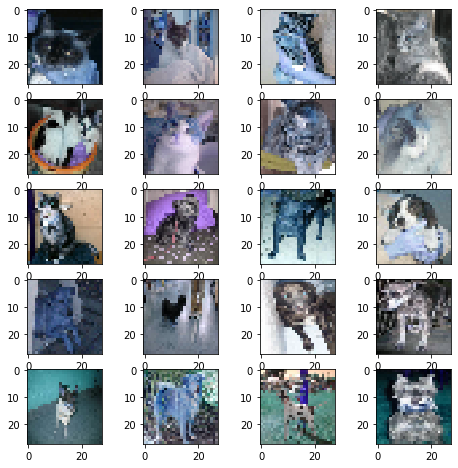

In [18]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i+12490])
plt.show()

### Pre-processing the images
So each image has the shape 28x28x3 which is a three dimensional array, in order to feed our images to the **FNN** algorithm we need to convert them to one dimensional array so the will have the shape 2352. We also scale image pixel values to the range [0, 1].
<br>
Complete the cell below. Reshpare the **images** variable to the shape (number of images, 28*28*3). Scale all the values into the range [0, 1] by dividing to 255.

In [19]:
# YOUR CODE HERE
# Reshape the images, flatten all the images
# use the reshape function
images = np.reshape(images, (len(images), 28*28*3))
# print (images.shape)

# Scale all the pixel values to have between 0 and 1
images = np.divide(images, 255)
# YOUR CODE HERE

### Split our dataset
Lets split our dataset into train/test with the ratio 9:1. Run the cell below to split the dataset.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

Print out the shape of **X_train, X_test, y_train, y_test** varialbes.
<br>
Print out the number of dog, cat for train and test datasets using the **y_train** and **y_test** variables.

In [21]:
# YOUR CODE HERE
print("X_train shape:{} \nX_test shape: {} \ny_train shape: {} \ny_test shape: {}".
      format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
print("Number of y_train's dogs: {} \nNumber of y_train's cats: {} \nNumber of y_test's dogs: {} \nNumber of y_test's cats: {}".
      format(np.sum(y_train), len(y_train)-np.sum(y_train), np.sum(y_test), len(y_test)-np.sum(y_test)))
# YOUR CODE HERE

X_train shape:(22500, 2352) 
X_test shape: (2500, 2352) 
y_train shape: (22500,) 
y_test shape: (2500,)
Number of y_train's dogs: 11298 
Number of y_train's cats: 11202 
Number of y_test's dogs: 1202 
Number of y_test's cats: 1298


### Create and train the model
Lets create and train our model using **scikit-learn**. Dont worry too much about the details of the model for now, we will learn more about it in later course. Run the cell below to create and train our model.

In [22]:
from sklearn.neural_network import MLPClassifier

# create the feed forward nerual network model
nn_model = MLPClassifier(solver='adam', alpha=1e-5, activation='relu',
                         hidden_layer_sizes=(64, 64), random_state=1,
                         max_iter=500)

# train the model
nn_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Evaluate the model
Use the **score** function of the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class to evaluate accuracies of **X_train** and **X_test**.

In [23]:
# YOUR CODE HERE
# evaluate the model
train_accuracy = nn_model.score(X_train, y_train)
test_accuracy = nn_model.score(X_test, y_test)
# YOUR CODE HERE

print ("train_accuracy: {:.2f}".format(train_accuracy))
print ("test_accuracy: {:.2f}".format(test_accuracy))

train_accuracy: 0.86
test_accuracy: 0.63


**Quizz:** What is the accuracy of the model on the train set ?
<br>
**Your answer:** 0.86
<br>
**Quizz:** What is the accuracy of the model on the test set ?
<br>
**Your answer:** 0.63

### (Optional) Evaluate the model using f1 score
Complete the cell below to get bonus points.

In [24]:
from sklearn.metrics import f1_score

# YOUR CODE HERE
y_test_pred = nn_model.predict(X_test)
f1 = f1_score(y_test, y_test_pred)
# YOUR CODE HERE

print ("Test f1: {:.2f}".format(f1))

Test f1: 0.57
